In [48]:
# Import Dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time 

In [31]:
# Create a set of random latitude and longitude combinations.

latitudes = np.random.uniform(low = -90, high = 90, size = 1500)
longitudes = np.random.uniform (low = -180, high = 180, size = 1500)
latitudes_longitudes = zip(latitudes,longitudes)
latitudes_longitudes

In [32]:
# Unpack the longitudes and latitudes and put them in a list. 

coordinates = list(latitudes_longitudes)
len(coordinates)

1500

In [33]:
# Nearest cities for the above coordinates.

# Create a empty list that will hold all the cities name nearest to the above coordinates.
cities = []
# Identify the nearest city for each latitude and longitutde combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # if city is unique then add to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



595

In [36]:
# Basic for the OpenWeatherMap with weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [37]:
# Create an empty list to hold weather data for cities.
city_data = []
# Print the begining of logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1

set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | miedzyrzecz
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | waingapu
Processing Record 8 of Set 1 | kathmandu
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | alta
Processing Record 16 of Set 1 | sampit
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | santa maria
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ratnagiri
Processing Record 23 o

In [40]:
# Tally number of cities on the city_data.  
len(city_data)

547

In [42]:
# Create the DataFrame from the array of dictionaries.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,65.16,79,76,16.26,UY,2020-04-03 07:30:13
1,Miedzyrzecz,52.44,15.58,44.01,70,75,11.41,PL,2020-04-03 07:30:14
2,Luderitz,-26.65,15.16,77.00,44,0,2.24,NA,2020-04-03 07:30:14
3,Pevek,69.70,170.31,5.77,95,100,8.63,RU,2020-04-03 07:30:15
4,Vaini,-21.20,-175.20,75.20,94,75,2.24,TO,2020-04-03 07:30:15
5,Mahebourg,-20.41,57.70,84.99,74,75,5.82,MU,2020-04-03 07:30:15
6,Waingapu,-9.66,120.26,84.36,73,59,6.20,ID,2020-04-03 07:30:15
7,Kathmandu,27.72,85.32,78.80,27,20,4.70,NP,2020-04-03 07:26:36
8,Esperance,-33.87,121.90,60.80,59,90,16.11,AU,2020-04-03 07:30:17
9,Hobart,-42.88,147.33,68.00,56,40,10.29,AU,2020-04-03 07:29:19


In [44]:
# Reorder the columns of the  city data DataFrame.

new_columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_columns_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-04-03 07:30:13,-33.70,-53.46,65.16,79,76,16.26
1,Miedzyrzecz,PL,2020-04-03 07:30:14,52.44,15.58,44.01,70,75,11.41
2,Luderitz,NA,2020-04-03 07:30:14,-26.65,15.16,77.00,44,0,2.24
3,Pevek,RU,2020-04-03 07:30:15,69.70,170.31,5.77,95,100,8.63
4,Vaini,TO,2020-04-03 07:30:15,-21.20,-175.20,75.20,94,75,2.24
5,Mahebourg,MU,2020-04-03 07:30:15,-20.41,57.70,84.99,74,75,5.82
6,Waingapu,ID,2020-04-03 07:30:15,-9.66,120.26,84.36,73,59,6.20
7,Kathmandu,NP,2020-04-03 07:26:36,27.72,85.32,78.80,27,20,4.70
8,Esperance,AU,2020-04-03 07:30:17,-33.87,121.90,60.80,59,90,16.11
9,Hobart,AU,2020-04-03 07:29:19,-42.88,147.33,68.00,56,40,10.29


In [45]:
# Create the output csv file.

output_data_file = "weather_data/cities.csv"
# Export the city_data into the csv file.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [47]:
# Extract relavant fields from the DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [50]:
# Get today's date in seconds using time from time moduledate.
date_today = time.time()
date_today = time.strftime('%x')
date_today

'04/03/20'

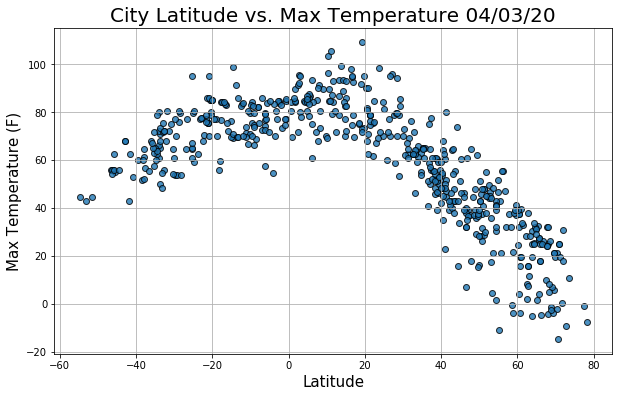

In [67]:
# Plot Latitude vs. Temperature.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, max_temps, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Max Temperature (F)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig1.png')
# Show the plot.
plt.show()

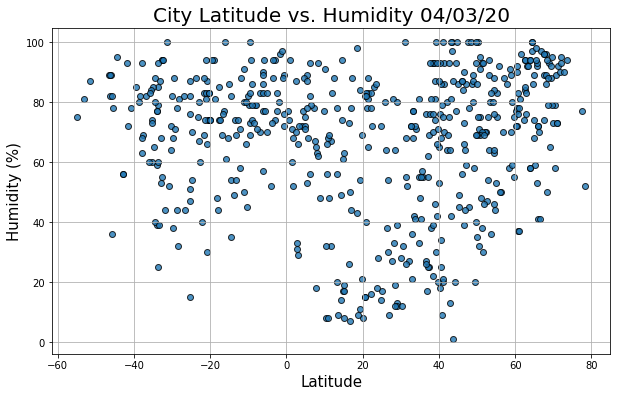

In [68]:
# Plot Latitude vs. humidity.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show the plot.
plt.show()

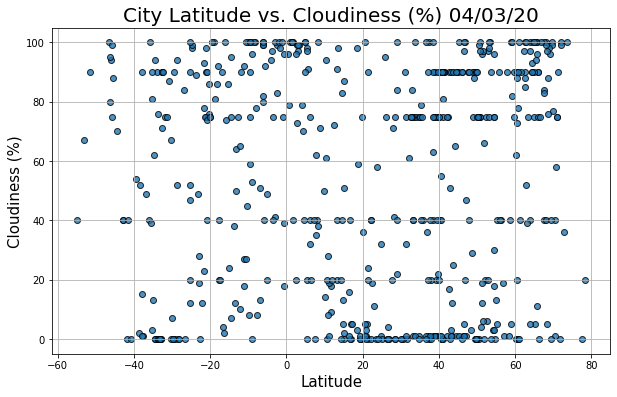

In [69]:
# Plot Latitude vs. cloudiness.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show the plot.
plt.show()

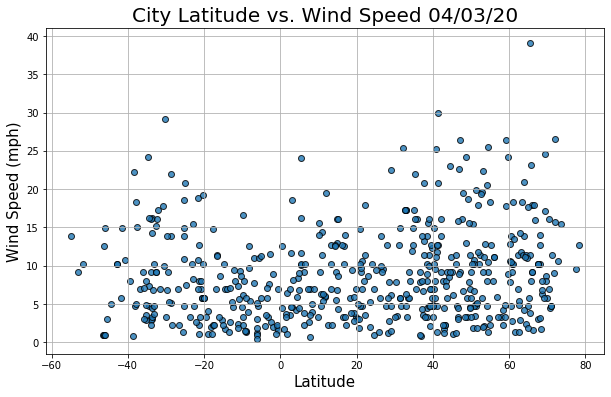

In [70]:
# Plot Latitude vs. wind speed.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Wind Speed (mph)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show the plot.
plt.show()